<a href="https://colab.research.google.com/github/Sakinat-Folorunso/OOU_DTS201_Introduction_to_Data_Science/blob/main/notebooks/EDA_Student_Centered_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA): Student-Centered Practical Notebook

**Instructor:** DR SAKINAT FOLORRUNSO
                  ASSOCIATE PROFESSOR OF AI SYSTEMS AND FAIR DATA
                  DEPARTMENT OF COMPUTER SCIENCES
                  OLABISI ONABANJO UNIVERSITY
                  AGO-IWOYE, OGUN STATE, NIGERIA

**Course:**    DTS 201: INTRODUCTION TO DATA SCIENCE  



## Learning Objectives

By the end of this notebook, you should be able to:

- Load and inspect a dataset using pandas  
- Identify and handle missing values  
- Detect outliers using statistical and visual methods  
- Explore relationships between variables  
- Create useful visualizations for understanding data patterns  
- Summarize your findings in clear, concise language  

> 💡 **How to use this notebook:**  
> Work through each section in order. Run the code cells, modify them, and answer the reflection questions in the markdown cells where indicated.


## 1. What is Exploratory Data Analysis (EDA)?

Exploratory Data Analysis (EDA) is the process of:

- **Understanding** the structure, patterns, and quirks in your dataset  
- **Cleaning** the data by handling missing values, duplicates, and incorrect types  
- **Visualizing** distributions, trends, and relationships between variables  
- **Generating hypotheses** or questions for further modelling and analysis  

In simple terms, EDA helps you **get to know your data** before you build any machine learning model.

> ✏️ **Student Task:**  
> In your own words (3–5 sentences), describe why EDA is important when working with real-world data.


## 2. Importing Required Libraries

In [ ]:
# Import pandas for data loading, cleaning, and manipulation
import pandas as pd

# Import numpy for numerical operations and working with arrays
import numpy as np

# Import matplotlib for basic plotting and data visualization
import matplotlib.pyplot as plt

# Import seaborn for more advanced and attractive statistical visualizations
import seaborn as sns

# Configure matplotlib to display plots directly inside the notebook
%matplotlib inline

# Optionally, set a default visual style for plots to improve readability
plt.style.use("seaborn-v0_8")

If your dataset is saved in Google Drive, you’ll need to mount Drive first. If you’re working locally on your computer, simply provide the correct file path to the dataset.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3. Loading the Dataset

In this section, you will load the dataset you want to analyze.

> 🔧 **Instruction:**  
> - If your lecturer provided a CSV file, upload it and replace the file name below.  
> - If you are using a built-in dataset, adjust the path accordingly.


In [ ]:
# Specify the path or file name of your dataset
# Replace 'your_dataset.csv' with the actual name of your dataset file
data_path = '/content/drive/My Drive/DTS201/titanic_train.csv'  # TODO: change this to your real file name

# Load the dataset into a pandas DataFrame
df = pd.read_csv(data_path)  # Reads the CSV file and stores it in the variable 'df'

# Display the first 5 rows to quickly inspect the structure of the data
df.head()  # Shows the top rows to help you understand what the columns look like

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> ✏️ **Student Task:**  
> - Briefly describe (3–4 sentences) what this dataset is about.  
> - What does each row represent? What do some of the columns represent?


## 4. Initial Data Inspection

In [ ]:
# Check the number of rows and columns in the dataset
df.shape  # Returns a tuple: (number_of_rows, number_of_columns)

(891, 12)

In [ ]:
# Display the basic information about the dataset
# This includes column names, data types, and number of non-null (non-missing) values
df.info()  # Helps you quickly see data types and missing values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Display basic statistical summary for all numerical columns
# This includes metrics like mean, standard deviation, min, max, and quartiles
df.describe()  # Gives an overview of the distribution of numerical features

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> ✏️ **Student Reflection:**  
> - How many rows and columns are present?  
> - List at least two columns that are numerical and two that are categorical (object/string).  
> - Are there any columns that surprise you in terms of their type or content?


## 5. Exploring Missing Values

In [ ]:
# Calculate the total number of missing values in each column
missing_counts = df.isnull().sum()  # Counts how many NaN values exist per column

# Display the number of missing values per column
missing_counts  # Helps identify which columns need cleaning

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


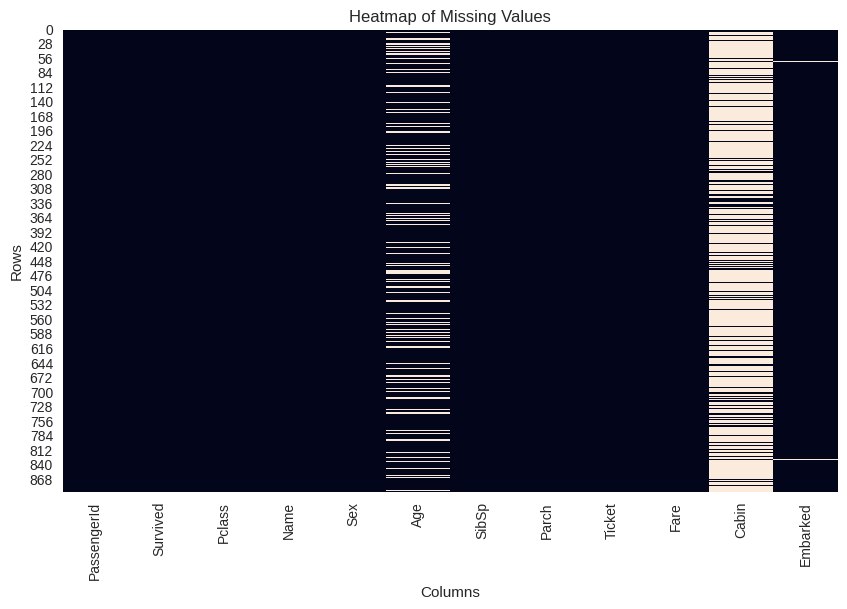

In [ ]:
# Visualize the pattern of missing values using a heatmap
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.heatmap(df.isnull(), cbar=False)  # Plot True/False matrix of missing values
plt.title("Heatmap of Missing Values")  # Add a title to the plot
plt.xlabel("Columns")  # Label the x-axis
plt.ylabel("Rows")  # Label the y-axis
plt.show()  # Render the plot on the screen

> ✏️ **Student Task:**  
> - Identify at least two columns with missing values.  
> - For each, suggest whether you would:  
>   - Drop the rows  
>   - Fill with mean/median/mode  
>   - Use a special value (e.g., 'Unknown')  
>   - Or leave as is (and why).


### 5.1 Example: Handling Missing Values

In [ ]:
# Example: selecting a numerical column to impute missing values
# Replace 'numeric_column_name' with the name of a numerical column in your dataset
numeric_col = "Age"  # TODO: change this to a real column

# Check how many missing values are in the selected column
df[numeric_col].isnull().sum()  # Shows how many entries need to be filled

np.int64(177)

In [ ]:
# Example: filling missing values in a numerical column with the median
median_value = df[numeric_col].median()  # Compute the median of the column
df[numeric_col] = df[numeric_col].fillna(median_value)  # Replace NaNs with the median

# Verify that there are no more missing values in this column
df[numeric_col].isnull().sum()  # Should now be 0 if all missing values were filled

np.int64(0)

## 6. Removing Duplicate Rows

In [ ]:
# Count how many duplicated rows exist in the dataset
duplicate_count = df.duplicated().sum()  # Checks all rows for exact duplicates

# Display the number of duplicated rows
duplicate_count  # Helps decide whether you need to remove duplicates

np.int64(0)

In [ ]:
# Remove duplicated rows from the dataset
df = df.drop_duplicates()  # Keeps only the first occurrence of each duplicated row

# Confirm that there are no more duplicated rows
df.duplicated().sum()  # Should return 0 after duplicates are removed

np.int64(0)

> ✏️ **Student Reflection:**  
> - Why might duplicate rows be a problem in data analysis or machine learning?  
> - Give an example scenario where duplicates could distort your results.


## 7. Univariate Analysis of Numerical Features

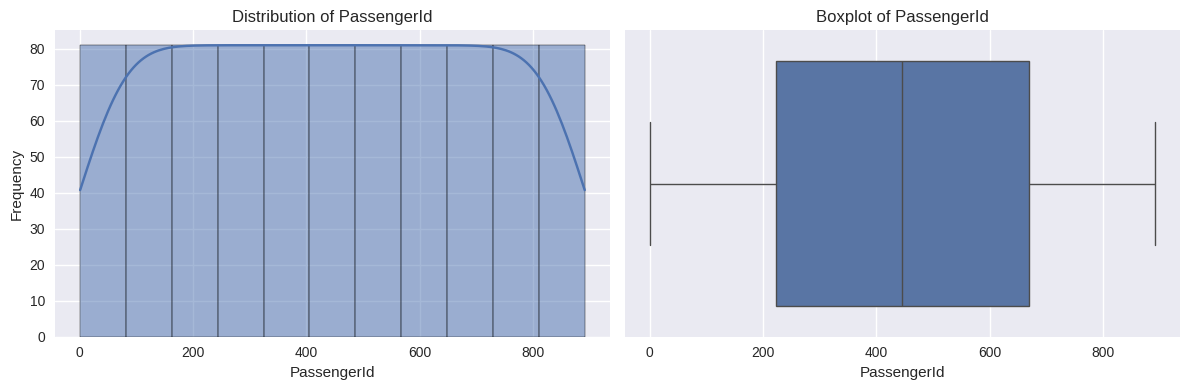

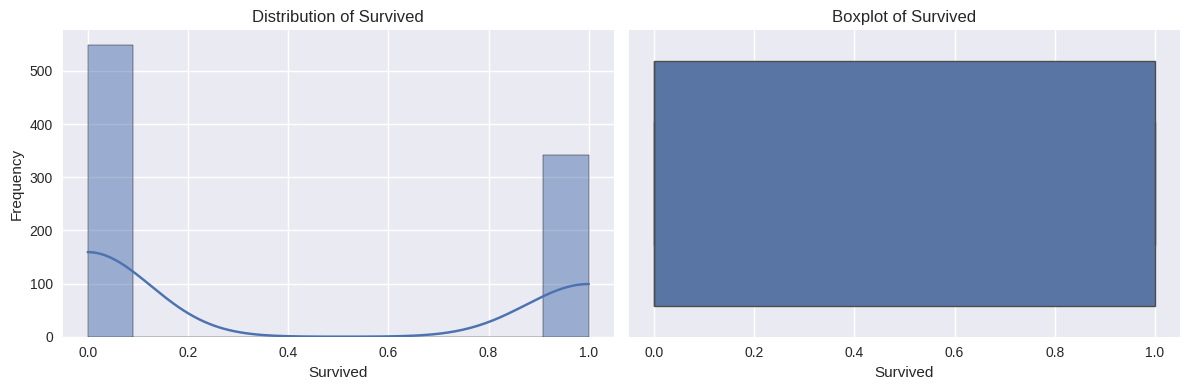

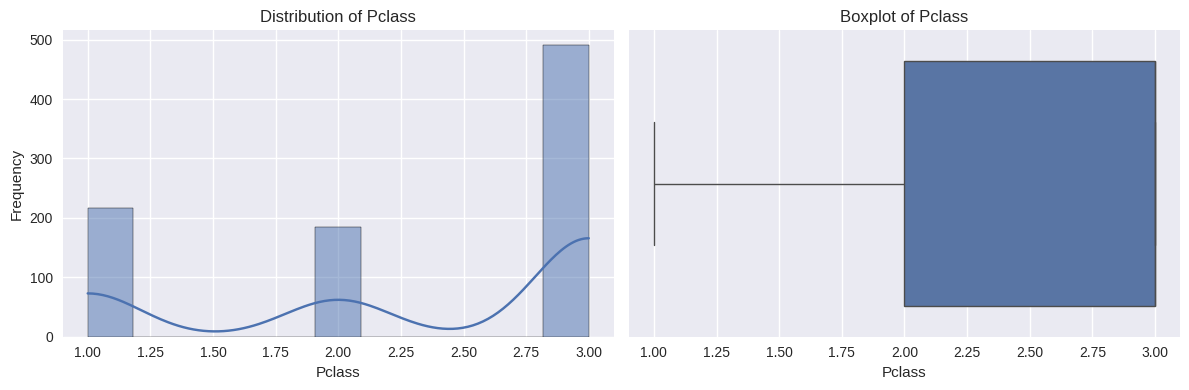

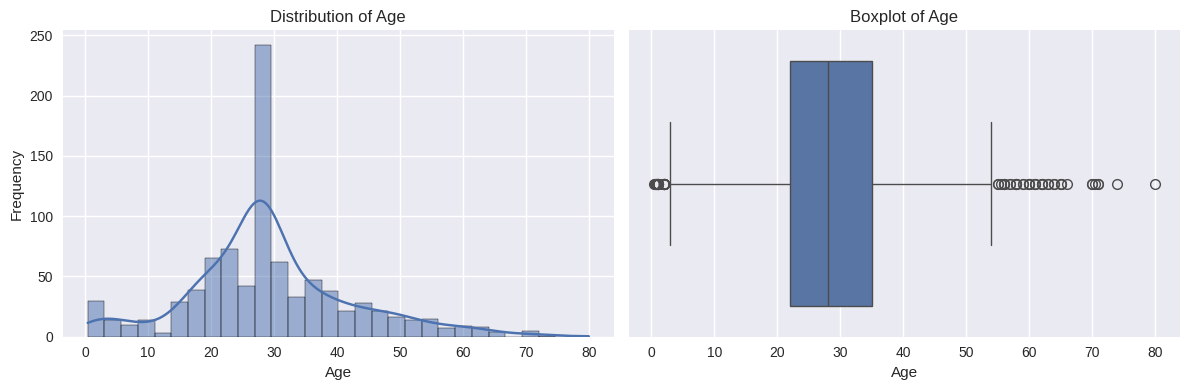

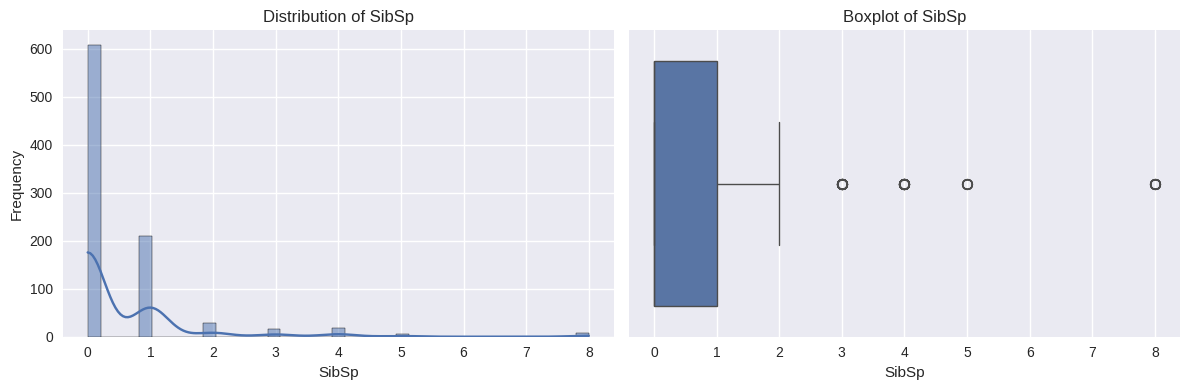

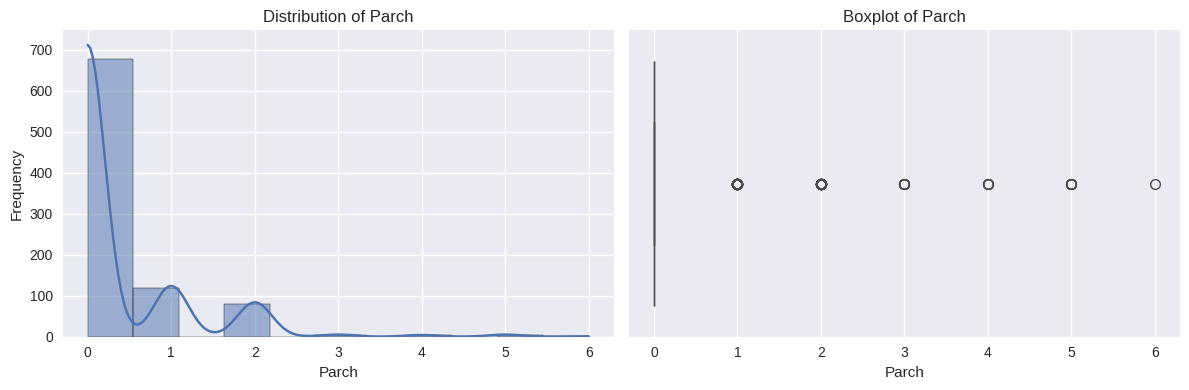

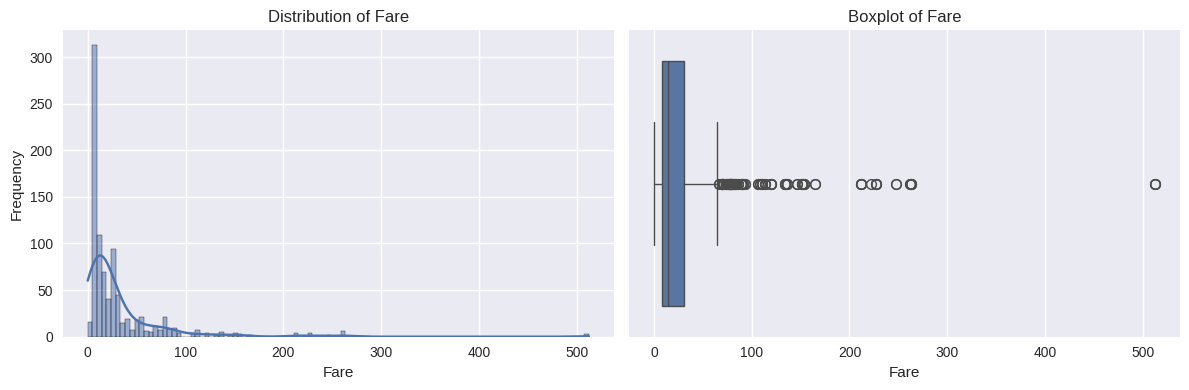

In [ ]:
# Select all numerical columns in the dataset
num_cols = df.select_dtypes(include=np.number).columns.tolist()  # Creates a list of numeric column names

# Loop through each numerical column and plot its distribution and boxplot
for col in num_cols:  # Iterate over each numerical column name
    plt.figure(figsize=(12, 4))  # Create a figure with specific width and height

    # Plot the distribution (histogram + KDE) of the column
    plt.subplot(1, 2, 1)  # Define the first subplot in a 1-row, 2-column grid
    sns.histplot(df[col], kde=True)  # Plot a histogram with a kernel density estimate
    plt.title(f"Distribution of {col}")  # Set the title using the column name
    plt.xlabel(col)  # Label the x-axis with the column name
    plt.ylabel("Frequency")  # Label the y-axis as frequency

    # Plot a boxplot to visualize potential outliers
    plt.subplot(1, 2, 2)  # Define the second subplot in the 1x2 grid
    sns.boxplot(x=df[col])  # Create a horizontal boxplot for the column
    plt.title(f"Boxplot of {col}")  # Set a title for the boxplot
    plt.xlabel(col)  # Label the x-axis with the column name

    # Display both plots side by side
    plt.tight_layout()  # Adjust layout to prevent overlap of elements
    plt.show()  # Render the plots on the screen

> ✏️ **Student Task:**  
> - Choose two numerical features and describe their distributions.  
>   - Are they symmetric, skewed, or bimodal?  
>   - Do they appear to contain outliers?


## 8. Outlier Detection Using the IQR Method

In [ ]:
# Compute the first quartile (Q1) for all numerical columns
Q1 = df[num_cols].quantile(0.25)  # 25th percentile of each numerical column

# Compute the third quartile (Q3) for all numerical columns
Q3 = df[num_cols].quantile(0.75)  # 75th percentile of each numerical column

# Compute the Interquartile Range (IQR) for all numerical columns
IQR = Q3 - Q1  # IQR = Q3 - Q1, measures the spread of the middle 50% of the data

# Identify outliers for each column using the 1.5 * IQR rule
outlier_mask = (df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))  # Boolean mask of outliers

# Count how many outliers exist in each numerical column
outlier_counts = outlier_mask.sum()  # Sum True values (outliers) per column

# Display the number of outliers per numerical column
outlier_counts  # Helps identify which features have many extreme values

,0
PassengerId,0
Survived,0
Pclass,0
Age,66
SibSp,46
Parch,213
Fare,116


> ✏️ **Student Reflection:**  
> - Which columns contain the most outliers?  
> - Would you: remove, cap, or leave these outliers? Explain your reasoning.


## 9. Correlation and Relationships Between Numerical Features

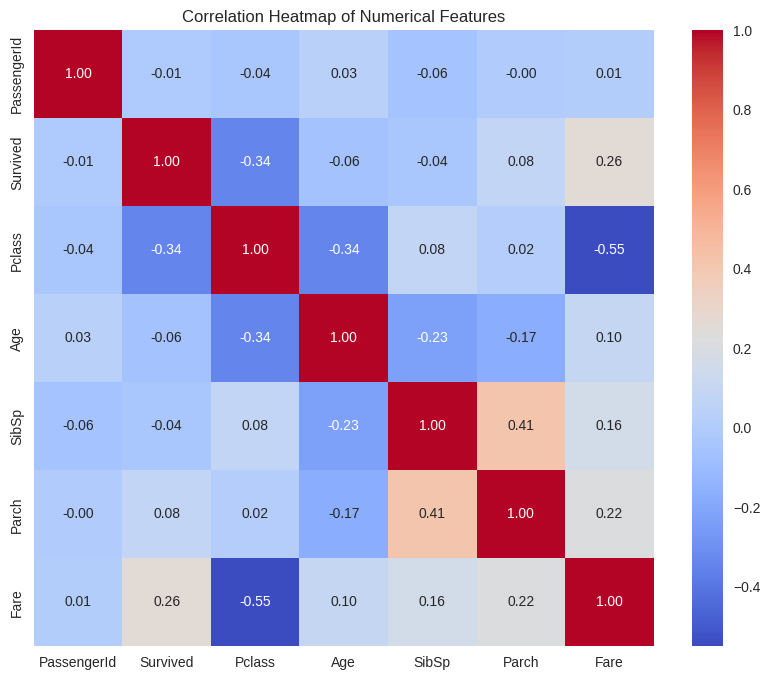

In [ ]:
# Compute the correlation matrix for all numerical columns
corr_matrix = df[num_cols].corr()  # Calculates pairwise correlation coefficients

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")  # Create heatmap with annotations
plt.title("Correlation Heatmap of Numerical Features")  # Add a title to the heatmap
plt.show()  # Display the heatmap

In [ ]:
# Optional: visualizing pairwise relationships with pairplot (can be slow on large data)
# Uncomment the next two lines if your dataset is small or you select only a subset of columns

# sns.pairplot(df[num_cols])  # Creates scatter plots and histograms for pairs of numerical features
# plt.show()  # Displays the pairplot

> ✏️ **Student Task:**  
> - Identify one pair of features with strong **positive** correlation.  
> - Identify one pair of features with **negative** or weak correlation.  
> - Suggest a possible real-world interpretation of one strong correlation.


## 10. Analysis of Categorical Features

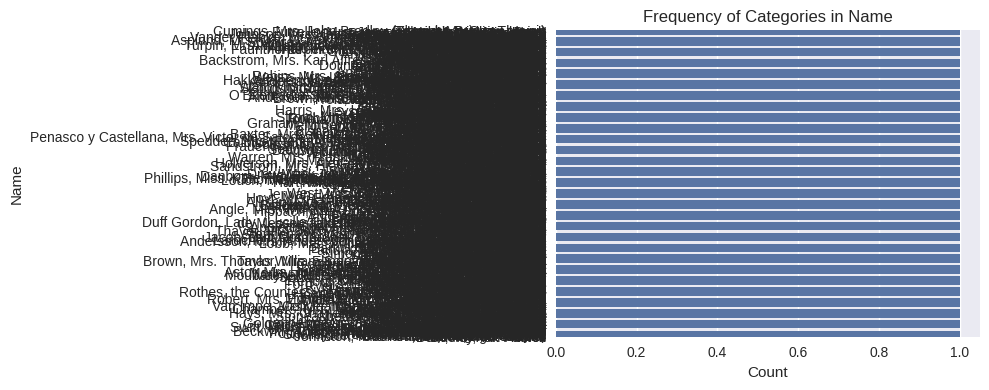

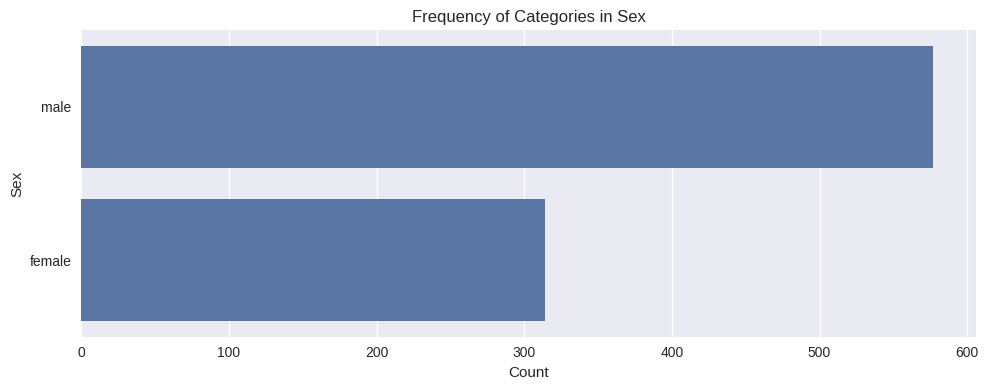

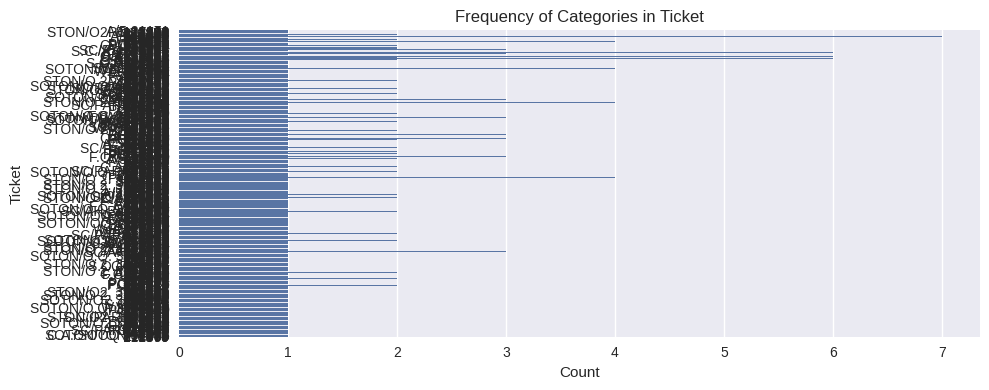

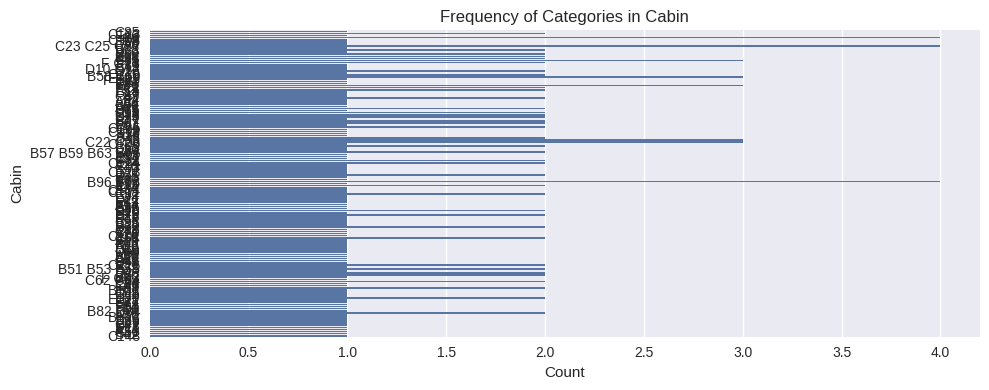

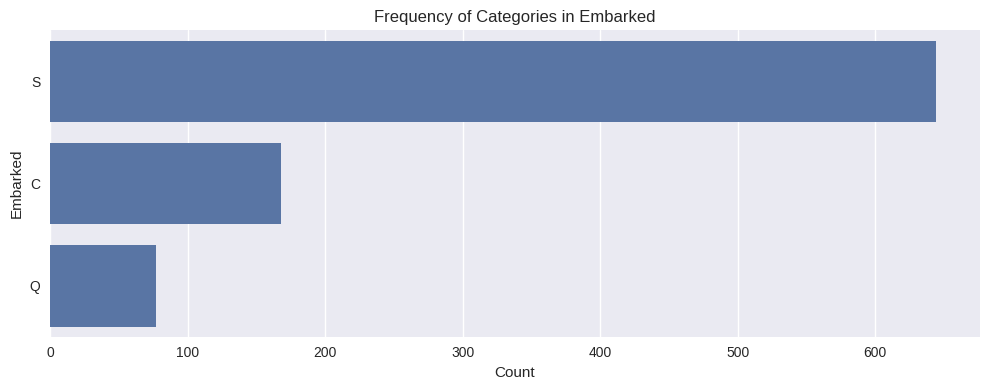

In [ ]:
# Select all categorical (object-type) columns in the dataset
cat_cols = df.select_dtypes(include="object").columns.tolist()  # Creates a list of categorical column names

# Loop through each categorical column to visualize its frequency distribution
for col in cat_cols:  # Iterate over each categorical column
    plt.figure(figsize=(10, 4))  # Create a figure with specific size

    # Plot a countplot showing the frequency of each category
    sns.countplot(y=df[col])  # Horizontal countplot for easier label reading
    plt.title(f"Frequency of Categories in {col}")  # Set the title showing the column name
    plt.xlabel("Count")  # Label the x-axis as count
    plt.ylabel(col)  # Label the y-axis with the column name

    # Display the plot
    plt.tight_layout()  # Adjust layout to avoid label cutoff
    plt.show()  # Render the plot on the screen

> ✏️ **Student Task:**  
> - Pick one categorical feature.  
> - Which category appears most frequently?  
> - Do you think the distribution is balanced or imbalanced? What might that imply?


## 11. Summary of Your EDA Findings

> 🧠 **Student Summary (Required):**  
> Write 1–2 paragraphs (or bullet points) summarizing what you learned about this dataset. You may include:

- Key data quality issues (missing values, duplicates, outliers)  
- Interesting distributions or patterns  
- Important correlations between features  
- Any anomalies or unexpected findings  
- Questions or hypotheses for further analysis or modelling


## 12. Optional Extension Tasks (For Further Learning)

If you finish early or want to go deeper, try one or more of these:

1. **Feature Importance (if you have a target variable):**  
   - Build a simple decision tree or random forest model.  
   - Plot the feature importances and interpret the top 3 features.

2. **Compare Before & After Cleaning:**  
   - Save a copy of the original DataFrame.  
   - Compare distributions before and after handling missing values or outliers.

3. **Dimensionality Reduction (PCA):**  
   - Standardize numerical features and apply PCA.  
   - Plot the first two principal components and see if any clusters appear.

> ✅ You can modify this notebook and submit it as part of your assignment or project report, depending on your course requirements.
